In [166]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [167]:
dataset=pd.read_csv("HousingPrice.csv")

In [168]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,furnished
1,12250000,8960,4,4,4,yes,no,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,unfurnished
3,12215000,7500,4,2,2,yes,no,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,furnished


In [196]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   furnishingstatus  545 non-null    int64
dtypes: int64(9)
memory usage: 38.4 KB


In [197]:
from sklearn.preprocessing import LabelEncoder
for x in dataset:
    dataset["mainroad"] = LabelEncoder().fit_transform(dataset["mainroad"])
    dataset["guestroom"] = LabelEncoder().fit_transform(dataset["guestroom"])
    dataset["basement"] = LabelEncoder().fit_transform(dataset["basement"])
    dataset["furnishingstatus"] = LabelEncoder().fit_transform(dataset["furnishingstatus"])

In [198]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0
1,12250000,8960,4,4,4,1,0,0,0
2,12250000,9960,3,2,2,1,0,1,1
3,12215000,7500,4,2,2,1,0,1,0
4,11410000,7420,4,1,2,1,1,1,0


In [199]:
dataset.shape

(545, 9)

In [200]:
x=dataset.iloc[:,1:].values
y=dataset.iloc[:,0].values

In [201]:
(x)

array([[7420,    4,    2, ...,    0,    0,    0],
       [8960,    4,    4, ...,    0,    0,    0],
       [9960,    3,    2, ...,    0,    1,    1],
       ...,
       [3620,    2,    1, ...,    0,    0,    1],
       [2910,    3,    1, ...,    0,    0,    0],
       [3850,    3,    1, ...,    0,    0,    1]], dtype=int64)

In [202]:
y

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

In [203]:
dataset.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
furnishingstatus    0
dtype: int64

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>],
       [<Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'furnishingstatus'}>]], dtype=object)

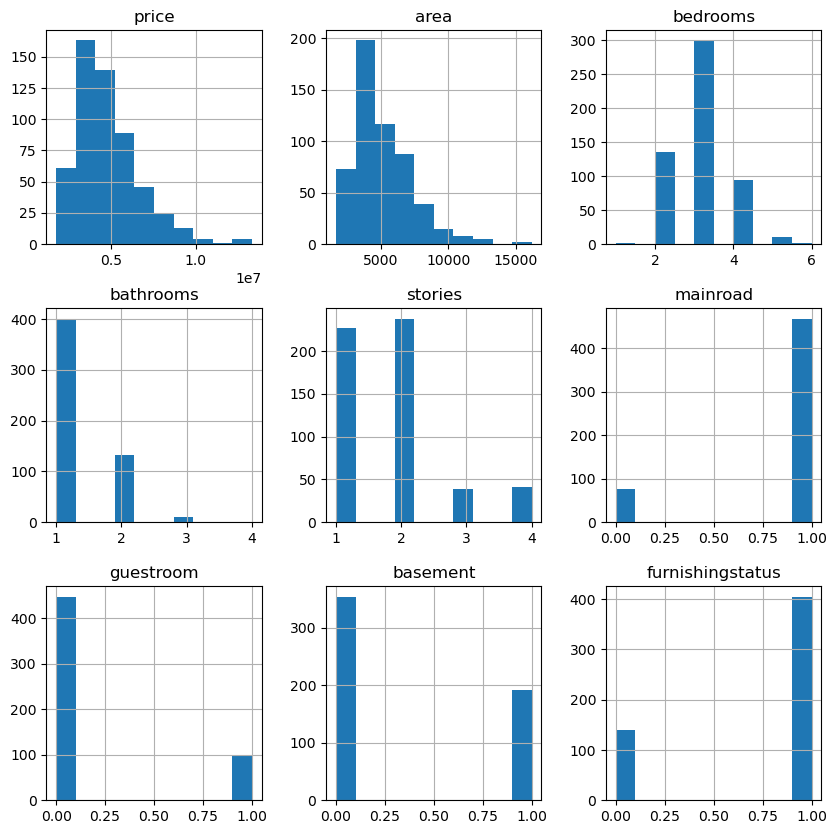

In [204]:
dataset.hist(bins=10, figsize=(10, 10))

In [205]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [211]:
b_init = 909.909840909
w_init = np.array([ 0.39133572,0.39133535, 18.39133535, 0.10003020, 0.42131618, 0.39133535, 0.10003020, 0.42131618])

In [214]:
def compute_cost(x, y, w, b): 
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)    
    return cost

In [215]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(cost)

13353346324298.469


In [219]:
def dwdb(x, y, w, b): 
    m = x.shape[0]
    dj_dw = np.zeros((n,))
    c=0.0
    for i in range(m):                                
        f_wb_i = np.dot(x[i], w)+b
        for j in range(n):
            dj_dw[j] = dj_dw[j]+(f_wb_i-y[i])*x[i,j]
        c+=(f_wb_i - y[i])
    dj_dw =  dj_dw/ (m)
    c=c/(m)
    return dj_dw,c

In [220]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    J_history = []
    w = w_in.copy()
    b = b_in
    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(X, y, w, b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db      
        if i<100000:
            J_history.append( cost_function(X, y, w, b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    return w, b, J_history

In [234]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 5.0e-8
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,n= x_test.shape
ypred2=[]
for i in range(m):
    ypred2.append(np.dot(x_test[i], w_final)+b_final)

Iteration    0: Cost 4629415499395.88   
Iteration  100: Cost 1664107146998.18   
Iteration  200: Cost 1664089419542.41   
Iteration  300: Cost 1664071692523.23   
Iteration  400: Cost 1664053965940.63   
Iteration  500: Cost 1664036239794.60   
Iteration  600: Cost 1664018514085.13   
Iteration  700: Cost 1664000788812.21   
Iteration  800: Cost 1663983063975.82   
Iteration  900: Cost 1663965339575.96   
b,w found by gradient descent: 15.34,[882.28439695  62.51811989  36.52582778  55.06189717  14.20958023
   8.22053637  12.32476198   6.6619177 ] 


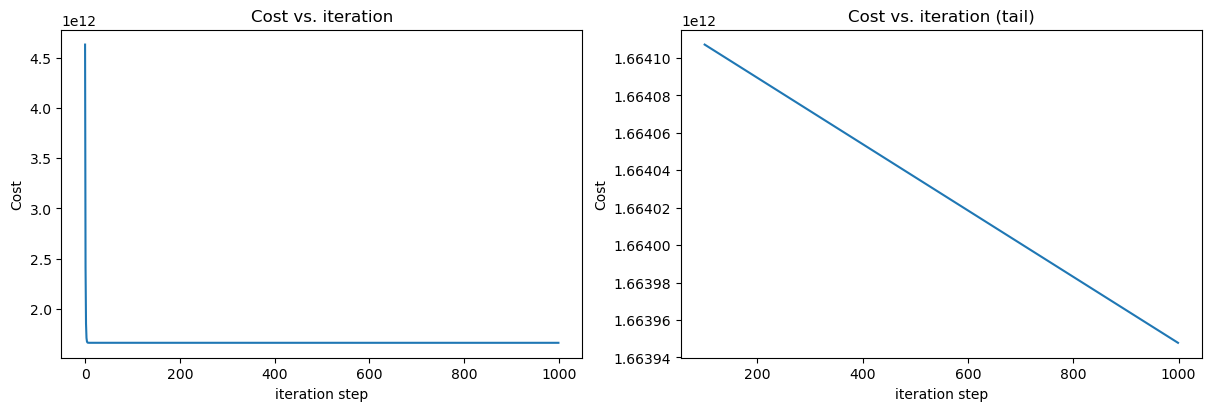

In [235]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [236]:
ypred2

[3529501.3406306556,
 8487896.914373336,
 3053136.946313428,
 11646412.537346473,
 3229579.616123866,
 5602969.481732372,
 3397110.2811081833,
 3070705.906552376,
 3098835.636818063,
 7941132.493139452,
 5294285.964197079,
 3494209.9647525214,
 3044263.9089859873,
 5346972.681755754,
 5280799.79336558,
 2144252.227854181,
 4323513.766448471,
 5311667.422496969,
 2735450.1604720782,
 3970525.95909028,
 7190990.259133756,
 5691106.784313047,
 4411792.399501713,
 1500253.8895556328,
 5664703.62983463,
 2779561.6124492665,
 6176318.456273238,
 5011754.00996637,
 2911994.3010985507,
 5664586.8441225905,
 3882304.181312645,
 2007622.4797009828,
 7411579.894441482,
 3564681.798409436,
 2753095.8484111456,
 5682164.351097493,
 5294151.639336934,
 2678998.168647297,
 3044064.8241693685,
 1919345.3138265947,
 7499927.776542888,
 5205945.515889148,
 5117766.566686522,
 4848480.438858435,
 3105956.4301135754,
 5294168.384180024,
 3670638.989462075,
 3564681.798409436,
 3570105.4095701887,
 5029350

In [237]:
y_test

array([ 4585000,  6083000,  4007500,  6930000,  2940000,  6195000,
        3535000,  2940000,  3500000,  7980000,  6755000,  3990000,
        3150000,  3290000,  4130000,  2660000,  4410000,  3710000,
        3360000,  4270000,  5005000,  5383000,  6440000,  1890000,
        6125000,  5460000,  5803000,  4620000,  5530000,  5950000,
        4305000,  3640000,  5250000,  3325000,  3703000,  4753000,
        9100000,  3500000,  3150000,  4270000,  8960000,  4060000,
        5740000,  3129000,  3633000,  7560000,  4620000,  3290000,
        4165000,  6650000,  4165000,  4690000,  3150000,  3850000,
        3290000,  5075000,  6510000,  5740000,  3780000,  4795000,
        4900000,  5460000,  3500000,  7525000,  2835000,  5495000,
        8680000,  4200000,  4200000,  4900000,  3332000,  6195000,
        4098500,  6650000,  3885000,  4620000,  1960000,  6440000,
        1750000,  3605000,  3290000,  4970000,  4613000,  3850000,
        3500000,  6107500,  3780000,  4900000,  3570000,  4340

In [206]:
from sklearn.linear_model import LinearRegression
Regression = LinearRegression()
Regression.fit(x_train, y_train)

LinearRegression()

In [207]:
y_pred = Regression.predict(x_test)

In [209]:
y_pred

array([ 4260237.12243919,  6298881.98784387,  3968898.41792428,
        7325536.08692192,  3388571.68653583,  7272922.13712766,
        3348123.14061415,  3070351.52414203,  2973389.64489254,
        8485469.64748818,  7060401.91989973,  4245929.94944481,
        4246403.13053695,  5521116.50586652,  4646687.88896961,
        2188355.90295325,  4511200.26766419,  4124287.27555935,
        3469352.77047575,  3678806.57086361,  7086769.89847281,
        6478715.04621159,  4265886.69428888,  3085544.92225241,
        5815143.05545604,  5650403.02718496,  5009732.40370204,
        5004681.54971597,  6533017.94512741,  5154308.14829335,
        3291008.88536781,  3797642.86413291,  6512488.70311426,
        3162244.32841838,  3476506.35697294,  4020674.70808127,
        5412323.29284785,  4098323.8900451 ,  3049405.39584201,
        3634072.30950328,  8052792.10113933,  5894826.12066123,
        6735028.17100874,  4471425.01978844,  3230088.9634105 ,
        6300131.70589438,  4489496.03562

In [210]:
y_test

array([ 4585000,  6083000,  4007500,  6930000,  2940000,  6195000,
        3535000,  2940000,  3500000,  7980000,  6755000,  3990000,
        3150000,  3290000,  4130000,  2660000,  4410000,  3710000,
        3360000,  4270000,  5005000,  5383000,  6440000,  1890000,
        6125000,  5460000,  5803000,  4620000,  5530000,  5950000,
        4305000,  3640000,  5250000,  3325000,  3703000,  4753000,
        9100000,  3500000,  3150000,  4270000,  8960000,  4060000,
        5740000,  3129000,  3633000,  7560000,  4620000,  3290000,
        4165000,  6650000,  4165000,  4690000,  3150000,  3850000,
        3290000,  5075000,  6510000,  5740000,  3780000,  4795000,
        4900000,  5460000,  3500000,  7525000,  2835000,  5495000,
        8680000,  4200000,  4200000,  4900000,  3332000,  6195000,
        4098500,  6650000,  3885000,  4620000,  1960000,  6440000,
        1750000,  3605000,  3290000,  4970000,  4613000,  3850000,
        3500000,  6107500,  3780000,  4900000,  3570000,  4340